In [1]:
import json
import torch
import os
import numpy as np
import torch
import torch.multiprocessing as mp
import torch
from torch.utils.data import DataLoader
%matplotlib inline
import matplotlib.pyplot as plt
from dnaDataloader import expermentDataloader
from dnaDataloader import addData
from dnaModelUtil import test
from dnaModelUtil import printStats
from IPython.core.interactiveshell import InteractiveShell
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
cpu = torch.device("cpu")
batch_size = 25
device

device(type='cuda', index=1)

In [2]:
try:
   mp.set_start_method('spawn')
except RuntimeError:
   pass # throws error if run twice without resetting the kernal, if its already set we dont care that this errors

In [3]:
with open("./Models/smallTrain/results.json", 'r') as file:
    results = file.read()
results = json.loads(results)
results

{'1800_nM_AR_out': {'path': './Models/smallTrain/1800_nM_AR_out.pt',
  'acc': 0.54},
 '800_nM_AR_out': {'path': './Models/smallTrain/800_nM_AR_out.pt',
  'acc': 0.37000000000000005},
 '1200_nM_AR_out': {'path': './Models/smallTrain/1200_nM_AR_out.pt',
  'acc': 0.53},
 '400_nM_AR_out': {'path': './Models/smallTrain/400_nM_AR_out.pt',
  'acc': 0.43000000000000005},
 '50_nM_AR_out': {'path': './Models/smallTrain/50_nM_AR_out.pt',
  'acc': 0.8500000000000001},
 '100_nM_AR_out': {'path': './Models/smallTrain/100_nM_AR_out.pt',
  'acc': 0.52}}

In [4]:
folders = [d[0] for d in os.walk("/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted")][1:] # remove first one is it is "/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted"
len(folders)

6

In [5]:
datasets = []
featIn = 0
for d in folders:
    data = expermentDataloader(
        f"{d}/index.csv",
        f"{d}", 
    )
    rawData = [d for d in data]
    featIn = len(rawData[0][0])
    trainValidData = []
    testData = []
    addData(testData, trainValidData, rawData, rhsSize=300)


    np.random.shuffle(trainValidData)
    trainData = []
    validData = []
    addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

    datasets.append({"name": f"{os.path.basename(d)}", 
                     "train":DataLoader(trainData, batch_size=batch_size, shuffle=True) , 
                     "valid":DataLoader(validData, batch_size=batch_size, shuffle=True) , 
                     "test":DataLoader(testData, batch_size=len(testData), shuffle=True) ,
                     "model": {}}
                    )

In [6]:
for d in datasets:
    print(f"-- {d['name']} --")
    print(f"train: {len(d['train'])}")
    print(f"valid: {len(d['valid'])}")
    print(f"test : {len(d['test'])}")

-- 1800_nM_AR_out --
train: 8
valid: 4
test : 1
-- 800_nM_AR_out --
train: 8
valid: 4
test : 1
-- 1200_nM_AR_out --
train: 8
valid: 4
test : 1
-- 400_nM_AR_out --
train: 8
valid: 4
test : 1
-- 50_nM_AR_out --
train: 8
valid: 4
test : 1
-- 100_nM_AR_out --
train: 8
valid: 4
test : 1


In [7]:
manager = mp.Manager()
return_dict = manager.dict()

In [8]:
processes = []
devices = [torch.device("cuda:0"),torch.device("cuda:1"),torch.device("cuda:2"),torch.device("cuda:3")]
epochs = 1
error_margin = 20
for d in datasets:
    processes.append(mp.Process(target=test, args=(d["test"], results[d["name"]]["path"], d["name"], featIn, return_dict, epochs, error_margin, devices[0])))
    devices.append(devices.pop(0))
    
processes

[<Process name='Process-2' parent=3084921 initial>,
 <Process name='Process-3' parent=3084921 initial>,
 <Process name='Process-4' parent=3084921 initial>,
 <Process name='Process-5' parent=3084921 initial>,
 <Process name='Process-6' parent=3084921 initial>,
 <Process name='Process-7' parent=3084921 initial>]

In [9]:
print(f"{return_dict}")

{}


In [10]:
processesList = list(range(len(processes)))

while processesList:
    run = processesList[:4]
    processesList = processesList[4:]
    for i in run:
        processes[i].start()
    for i in run:
        processes[i].join()
        processes[i].terminate()
print(return_dict)

test 1800_nM_AR_out on cuda:0...
test 800_nM_AR_out on cuda:1...
test 1200_nM_AR_out on cuda:2...
test 400_nM_AR_out on cuda:3...
test 50_nM_AR_out on cuda:0...
test 100_nM_AR_out on cuda:1...
{'1800_nM_AR_out': {'outputPlot': array([[ 60.287704],
       [ 46.12549 ],
       [ 92.952866],
       [ 51.4605  ],
       [ 52.353516],
       [ 42.699387],
       [ 42.699387],
       [ 48.442017],
       [ 42.699387],
       [ 50.26832 ],
       [ 77.19183 ],
       [ 71.49448 ],
       [217.97041 ],
       [ 42.699387],
       [ 58.41913 ],
       [ 49.09771 ],
       [ 57.071667],
       [ 55.952667],
       [ 49.43772 ],
       [ 49.883377],
       [ 42.19472 ],
       [ 42.699387],
       [ 44.057236],
       [ 42.699387],
       [ 63.798225],
       [ 42.699387],
       [ 61.02561 ],
       [ 47.57054 ],
       [ 92.16252 ],
       [ 42.699387],
       [ 56.275124],
       [154.87573 ],
       [ 59.44423 ],
       [ 42.699387],
       [ 55.343895],
       [144.06743 ],
       [ 75.43333

In [11]:
print(f"{return_dict}")

{'1800_nM_AR_out': {'outputPlot': array([[ 60.287704],
       [ 46.12549 ],
       [ 92.952866],
       [ 51.4605  ],
       [ 52.353516],
       [ 42.699387],
       [ 42.699387],
       [ 48.442017],
       [ 42.699387],
       [ 50.26832 ],
       [ 77.19183 ],
       [ 71.49448 ],
       [217.97041 ],
       [ 42.699387],
       [ 58.41913 ],
       [ 49.09771 ],
       [ 57.071667],
       [ 55.952667],
       [ 49.43772 ],
       [ 49.883377],
       [ 42.19472 ],
       [ 42.699387],
       [ 44.057236],
       [ 42.699387],
       [ 63.798225],
       [ 42.699387],
       [ 61.02561 ],
       [ 47.57054 ],
       [ 92.16252 ],
       [ 42.699387],
       [ 56.275124],
       [154.87573 ],
       [ 59.44423 ],
       [ 42.699387],
       [ 55.343895],
       [144.06743 ],
       [ 75.43333 ],
       [ 50.540108],
       [ 44.88952 ],
       [106.50813 ],
       [ 76.946884],
       [ 44.29151 ],
       [ 62.612236],
       [ 62.570152],
       [ 48.674263],
       [ 49.586723],


In [12]:
len(return_dict["1800_nM_AR_out"]["outputPlot"])
len(return_dict["1800_nM_AR_out"]["targetPlot"])

588

In [13]:
defultePlotSize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 5]

In [14]:
return_dict.keys()

['1800_nM_AR_out',
 '800_nM_AR_out',
 '1200_nM_AR_out',
 '400_nM_AR_out',
 '50_nM_AR_out',
 '100_nM_AR_out']

+---------- 1800 nM AR (prediction - real) ----------
| total number of experments: 588
| min: -249
| max: 34
| average: -30.018707482993197
| median: -12.0
| mode: ModeResult(mode=array([-1], dtype=int32), count=array([96]))
| std: 44.540602783175075
| average difference: 42.773905132751565
| accuracy: 0.5901360544217688
+------------------


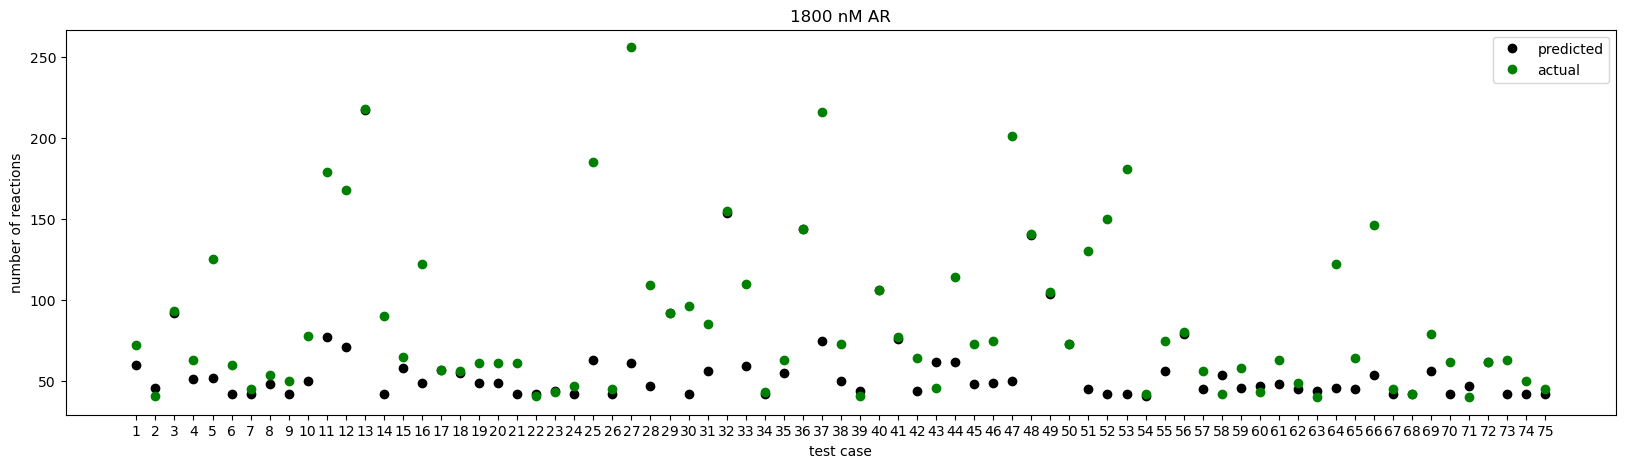

+---------- 800 nM AR (prediction - real) ----------
| total number of experments: 264
| min: -183
| max: 23
| average: -24.734848484848484
| median: -7.5
| mode: ModeResult(mode=array([-1], dtype=int32), count=array([71]))
| std: 35.64999465520909
| average difference: 34.79749971194838
| accuracy: 0.6477272727272727
+------------------


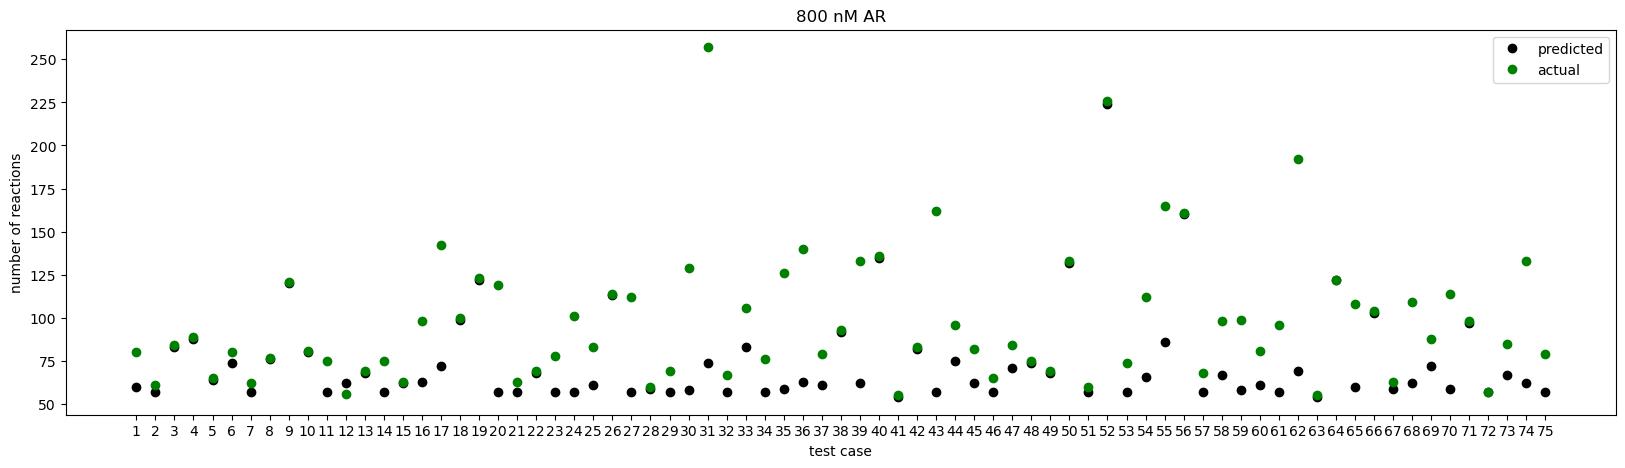

+---------- 1200 nM AR (prediction - real) ----------
| total number of experments: 494
| min: -255
| max: 50
| average: -24.92105263157895
| median: -4.5
| mode: ModeResult(mode=array([-1], dtype=int32), count=array([62]))
| std: 43.97533171792662
| average difference: 41.10220824334201
| accuracy: 0.6295546558704453
+------------------


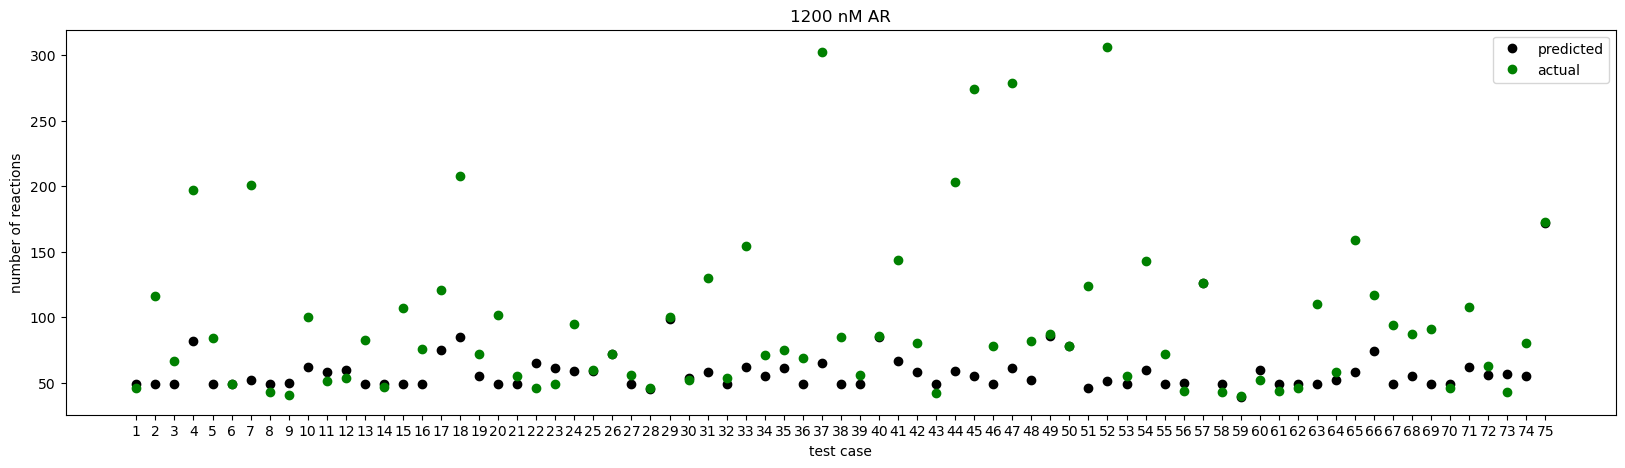

+---------- 400 nM AR (prediction - real) ----------
| total number of experments: 177
| min: -139
| max: 18
| average: -19.180790960451976
| median: -4.0
| mode: ModeResult(mode=array([-1], dtype=int32), count=array([59]))
| std: 28.921109789646334
| average difference: 27.138418079096045
| accuracy: 0.672316384180791
+------------------


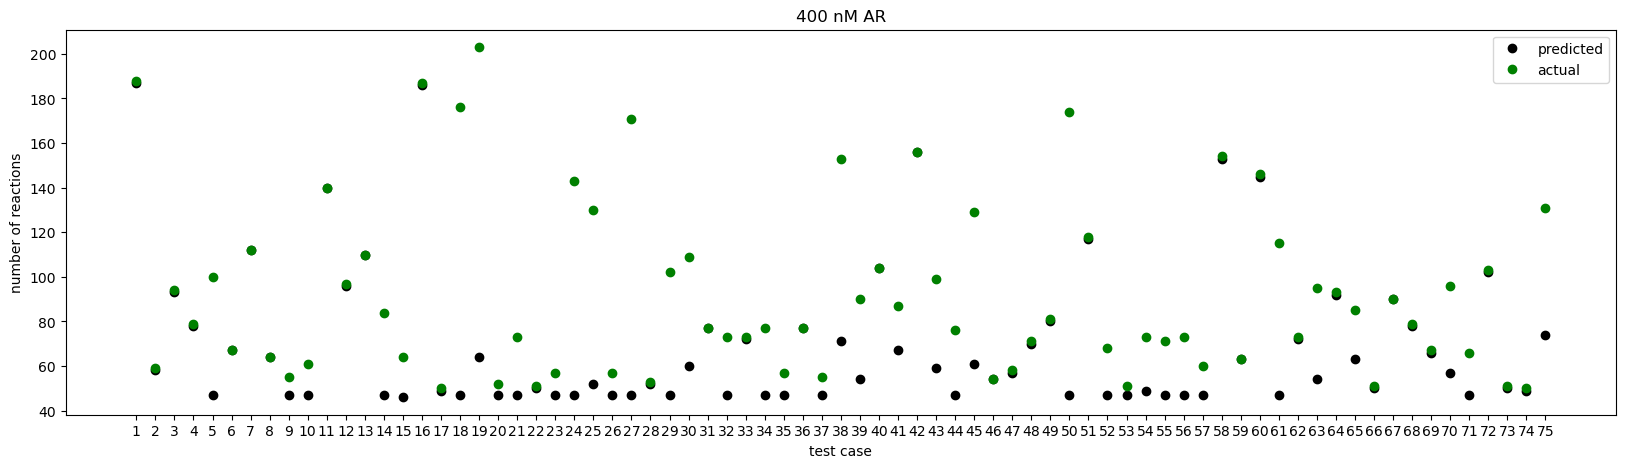

+---------- 50 nM AR (prediction - real) ----------
| total number of experments: 340
| min: -180
| max: 14
| average: -6.614705882352941
| median: 0.0
| mode: ModeResult(mode=array([0], dtype=int32), count=array([79]))
| std: 19.618308261191682
| average difference: 17.01962519521083
| accuracy: 0.8529411764705882
+------------------


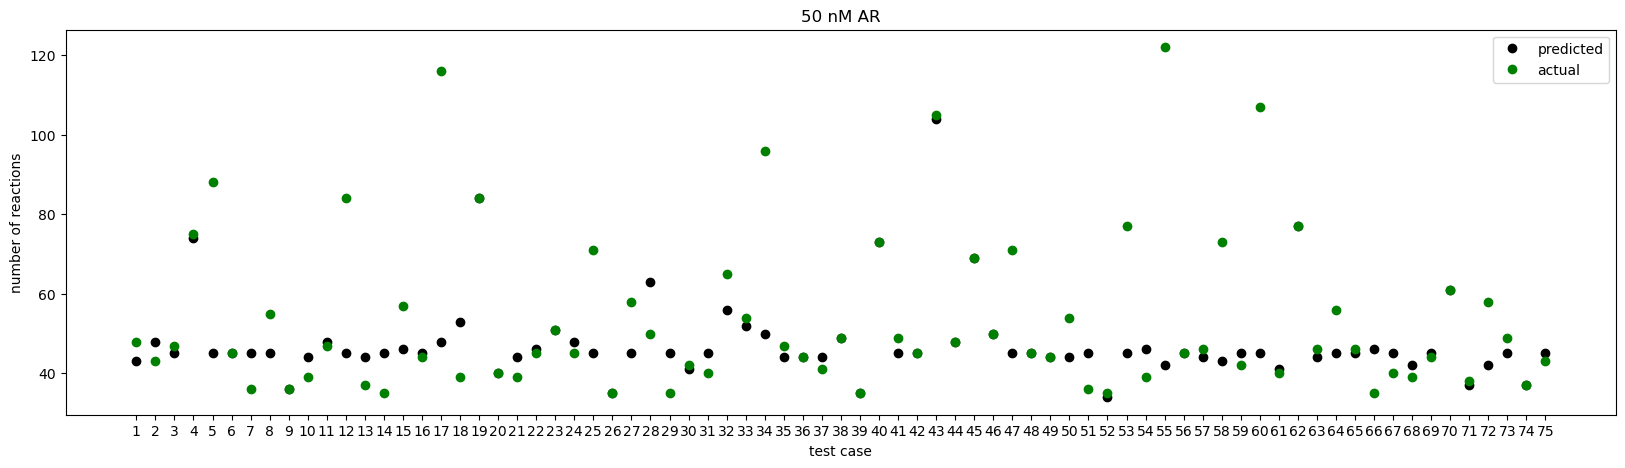

+---------- 100 nM AR (prediction - real) ----------
| total number of experments: 199
| min: -329
| max: 41
| average: -15.608040201005025
| median: -5.0
| mode: ModeResult(mode=array([-1], dtype=int32), count=array([53]))
| std: 33.00399146986781
| average difference: 23.704482005989544
| accuracy: 0.7638190954773869
+------------------


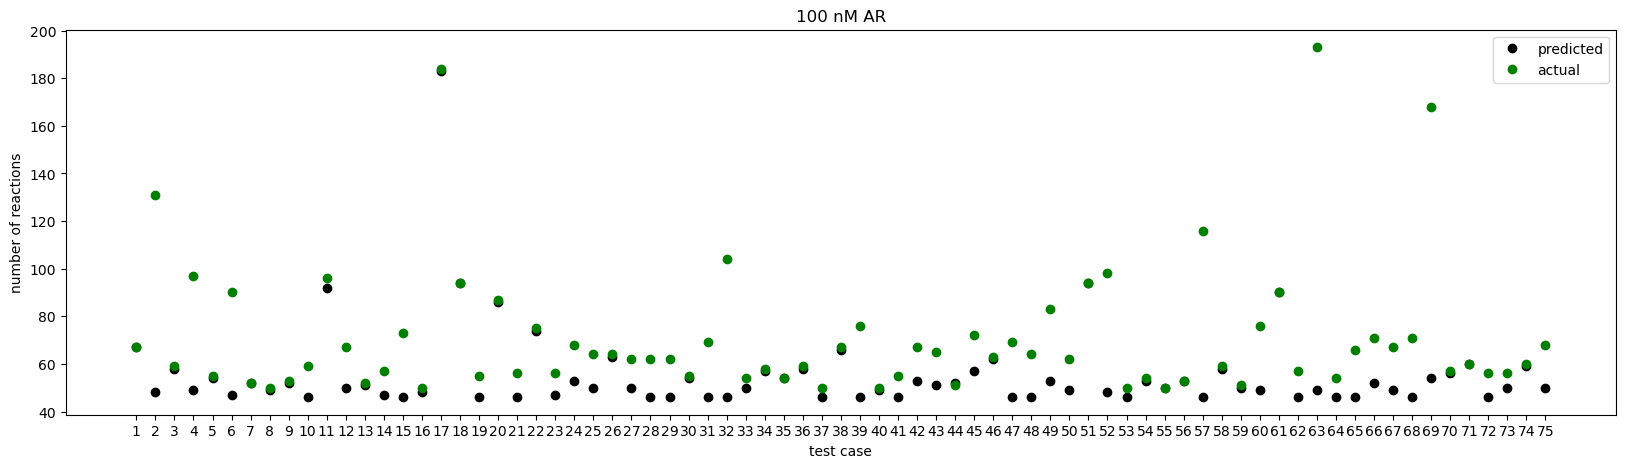

In [27]:
for k in return_dict.keys():
    title = k.split("_")
    title.pop()
    title = ' '.join(title)
    outputPlot = return_dict[k]["outputPlot"].astype("int32")
    targetPlot = return_dict[k]["targetPlot"].astype("int32")
    diffs = []
    for i in range(len(outputPlot)):
        diffs.append(outputPlot[i] - targetPlot[i])
    # printStats(targetPlot.flatten(), name=f"{title}")
    printStats(diffs, name=f"{title} (prediction - real)" ,other=[f"accuracy: {return_dict[k]['acc']}"])
    outputPlot = outputPlot[:75] 
    targetPlot = targetPlot[:75]
    x_marks = [i + 1 for i in list(range(len(outputPlot)))]
    plt.plot(x_marks, outputPlot, 'o', color='black', label="predicted")
    plt.plot(x_marks, targetPlot, 'o', color='green', label="actual")
    plt.xticks(ticks=x_marks, labels=x_marks)
    plt.xlabel('test case')
    plt.ylabel('number of reactions')
    plt.title(f"{title}")
    plt.legend(loc='upper right')
    plt.show()

* make error graph
* make verance graph
* compair movie lengths

In [ ]:
# defulte_ast_node_interactivity = InteractiveShell.ast_node_interactivity
# InteractiveShell.ast_node_interactivity = 'all'
# InteractiveShell.ast_node_interactivity